# Exploration of HDP - Theorem 4.4.5

Concentration inequality of the operator norm of a matrix, with independent, zero-mean, sub-gaussian random variable entries.

In [1]:
import os
import re
import json
import random
import collections
from pprint import pprint
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import scipy

from pprint import pprint
from natsort import natsorted, index_natsorted, order_by_index
import scipy
from scipy import interp
from sklearn import preprocessing

from sklearn import random_projection

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sample_unit_ball(N, d, radius=1, simplify=False):
    # sample from the surface of the unit ball
    samps = sample_unit_sphere(N, d)

    # sample from the radius pdf
    _samps = np.random.uniform(0, radius, (N, 1))
    r = _samps**(1/d)  # convert uniform sample to radius sample
    
    # scale samples by the radius pdf -> project to closure of unit ball
    samps = samps / r
    
    # simple sample d+1-dim sphere, and then drop two dimensions
    if simplify:
        samps = sample_unit_sphere(N, d+1)
        samps = samps[:, :-1]
    
    return samps

def sample_unit_sphere(N, d):
    # sample N d-dim vectors on uniform interval
    samps = np.random.normal(0, 1, (N, d))

    # normalize by length of each vector
    lengths = np.linalg.norm(samps, axis=1, keepdims=True)
    samps = samps / lengths
    return samps

In [3]:
def upper_tri_indexing(A):
    m = A.shape[0]
    r,c = np.triu_indices(m,1)
    return A[r,c]

In [4]:
def generate_random_line():
    b_hat = b / np.linalg.norm(b)    #unit vector of b
    return b_hat

def project_onto_line(p, b_hat):
    proj_p_onto_b = p.dot(b_hat)*b_hat
    return proj_p_onto_b

# Rectangular Matrices



Text(0, 0.5, 'Operator Norm')

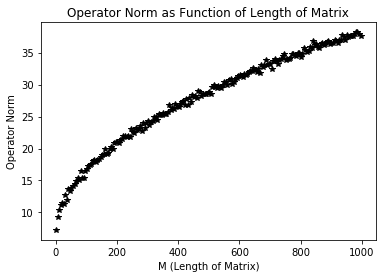

In [8]:
mean = 0
variance = 1
m = 100
n = 50

m_list = np.arange(1, 1000, 5)
norms = []
for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, n))

    # compute spectral norm
    norm = np.linalg.norm(A, ord=2)
    norms.append(norm)

fig, ax = plt.subplots(1,1)
ax.plot(m_list, norms, 'k*')
ax.set_title("Operator Norm as Function of Length of Matrix")
ax.set_xlabel("M (Length of Matrix)")
ax.set_ylabel("Operator Norm")

Text(0, 0.5, 'Operator Norm')

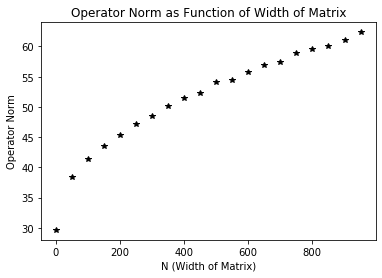

In [10]:
n_list = np.arange(1, 1000, 50)
norms = []
for n in n_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, n))

    # compute spectral norm
    norm = np.linalg.norm(A, ord=2)
    norms.append(norm)

fig, ax = plt.subplots(1,1)
ax.plot(n_list, norms, 'k*')
ax.set_title("Operator Norm as Function of Width of Matrix")
ax.set_xlabel("N (Width of Matrix)")
ax.set_ylabel("Operator Norm")

# Expectation and Standard Deviation as a Function of Length and Width of Random Matrix

Text(0, 0.5, 'Std Operator Norm')

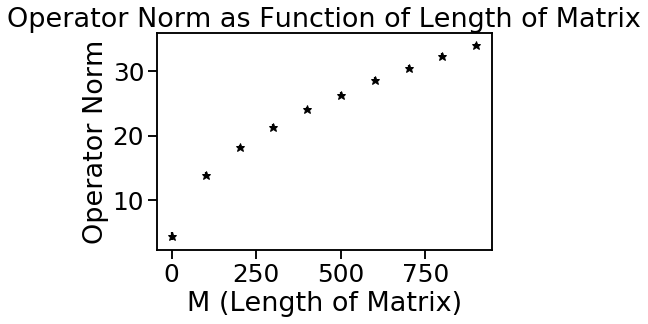

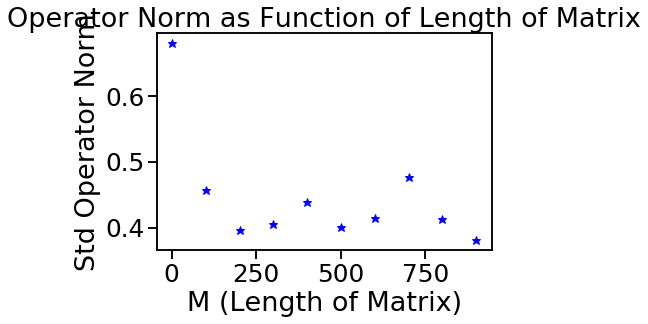

In [10]:
mean = 0
variance = 1
n = 20

m_list = np.arange(1, 1000, 100)
norms = []
n_samples = 100

sns.set_context("talk", font_scale=1.5)
fig, ax = plt.subplots(1,1)

for m in m_list:
    sample_norms = []
    for _ in range(n_samples):
        # generate sub-gaussian matrix with independent entries
        A = np.random.normal(loc=mean, scale=variance, size=(m, n))

        # compute spectral norm
        norm = np.linalg.norm(A, ord=2)
        sample_norms.append(norm)
    norms.extend(sample_norms)
    
    # plot point, and yerrors for each length, m
    dot = ax.plot(m, np.mean(sample_norms), 'k*')
    errbar = ax.errorbar(x=m, y=np.mean(sample_norms), yerr=np.std(sample_norms), color='black')
    
# add plot details
ax.set_title("Operator Norm as Function of Length of Matrix")
ax.set_xlabel("M (Length of Matrix)")
ax.set_ylabel("Operator Norm")
# ax.legend(['mean', 'std'])

mean = 0
variance = 1
n = 20
m_list = np.arange(1, 1000, 100)
norms = []
n_samples = 100

sns.set_context("talk", font_scale=1.5)
fig, ax = plt.subplots(1,1)

for m in m_list:
    sample_norms = []
    for _ in range(n_samples):
        # generate sub-gaussian matrix with independent entries
        A = np.random.normal(loc=mean, scale=variance, size=(m, n))

        # compute spectral norm
        norm = np.linalg.norm(A, ord=2)
        sample_norms.append(norm)
    norms.extend(sample_norms)
    ax.plot(m, np.std(sample_norms), 'b*')
    
# add plot details
ax.set_title("Operator Norm as Function of Length of Matrix")
ax.set_xlabel("M (Length of Matrix)")
ax.set_ylabel("Std Operator Norm")

Text(0, 0.5, 'Operator Norm')

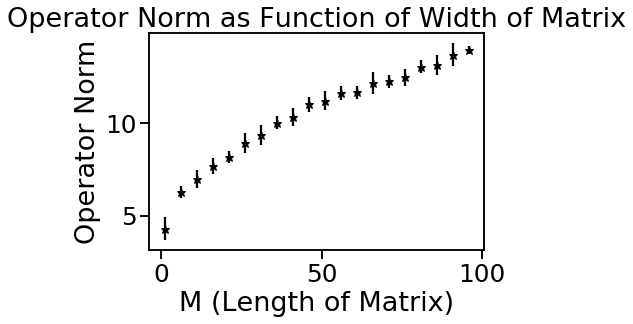

In [20]:
mean = 0
variance = 1
n = 20

m_list = np.arange(1, 100, 5)
norms = []
n_samples = 10

sns.set_context("talk", font_scale=1.5)
fig, ax = plt.subplots(1,1)

for m in m_list:
    sample_norms = []
    for _ in range(n_samples):
        # generate sub-gaussian matrix with independent entries
        A = np.random.normal(loc=mean, scale=variance, size=(n, m))

        # compute spectral norm
        norm = np.linalg.norm(A, ord=2)
        sample_norms.append(norm)
    norms.extend(sample_norms)
    
    # plot point, and yerrors for each length, m
    dot = ax.plot(m, np.mean(sample_norms), 'k*')
    errbar = ax.errorbar(x=m, y=np.mean(sample_norms), yerr=np.std(sample_norms), color='black')
    
# add plot details
ax.set_title("Operator Norm as Function of Width of Matrix")
ax.set_xlabel("M (Length of Matrix)")
ax.set_ylabel("Operator Norm")
# ax.legend(['mean', 'std'])

# Square Matrices

m = n = p

Text(0, 0.5, 'Operator Norm')

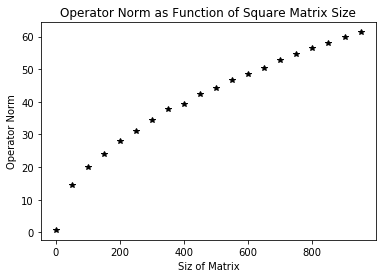

In [11]:
mean = 0
variance = 1

m_list = np.arange(1, 1000, 50)
norms = []
for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, m))

    # compute spectral norm
    norm = np.linalg.norm(A, ord=2)
    norms.append(norm)

fig, ax = plt.subplots(1,1)
ax.plot(m_list, norms, 'k*')
ax.set_title("Operator Norm as Function of Square Matrix Size")
ax.set_xlabel("Siz of Matrix")
ax.set_ylabel("Operator Norm")

# Distribution of Singular Values of Rescaled Matrices

Converges to a semicircle distribution. Since the eigenvalues of the square matrices are the square-root up to a +/-1 factor of the singular values, the singular values follow a quarter-circle distribution, while the eigenvalues follow a semi-circle distribution.

This is in line with the Wigner semicircle distribution

Text(0, 0.5, 'Count')

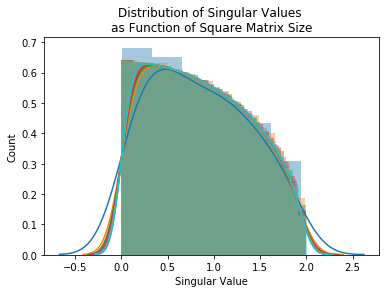

In [16]:
mean = 0
variance = 1
m_list = np.arange(100, 10000, 1000)
svals = []

fig, ax = plt.subplots(1,1)

for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, m))

    # compute spectral norm
    _svals = np.linalg.svd(1/np.sqrt(m)*A, compute_uv=False, full_matrices=False)
    svals.extend(_svals)

    ax = sns.distplot(_svals)
ax.set_title("Distribution of Singular Values \nas Function of Square Matrix Size")
ax.set_xlabel("Singular Value")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

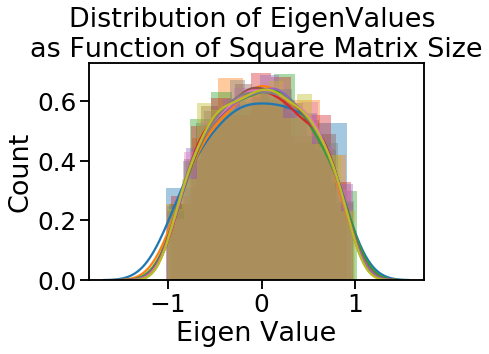

In [23]:
mean = 0
variance = 1
m_list = np.arange(100, 1000, 100)
evals = []

fig, ax = plt.subplots(1,1)

for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, m))

    # compute spectral norm
    _evals = np.linalg.eigvals(1/np.sqrt(m)*A)
    evals.extend(np.abs(_evals))

    ax = sns.distplot(np.real(_evals))
ax.set_title("Distribution of EigenValues \nas Function of Square Matrix Size")
ax.set_xlabel("Eigen Value")
ax.set_ylabel("Count")